In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

%matplotlib inline

In [2]:
titanic_train = pd.read_csv('Titanic_train.csv')
titanic_train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

Raport EDA  

In [20]:
profile = ProfileReport(titanic_train, title="Titanic -  Report")
profile

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]


In [21]:
titanic_train.isnull().mean()


PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [22]:
titanic_train.describe()


PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [23]:
titanic_train_prepared = titanic_train.copy()

In [24]:
titanic_train_prepared.drop(['PassengerId'], axis=1, inplace=True)

In [25]:
titanic_train_prepared['Survived'].value_counts(normalize = True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [26]:
titanic_train_prepared['Pclass'].value_counts(normalize=True)

Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64

C:\Users\kkleps\AppData\Local\Temp\ipykernel_23240\2698512467.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=titanic_train_prepared, palette = {'1': 'gold', '2': 'orange', '3': 'brown'})


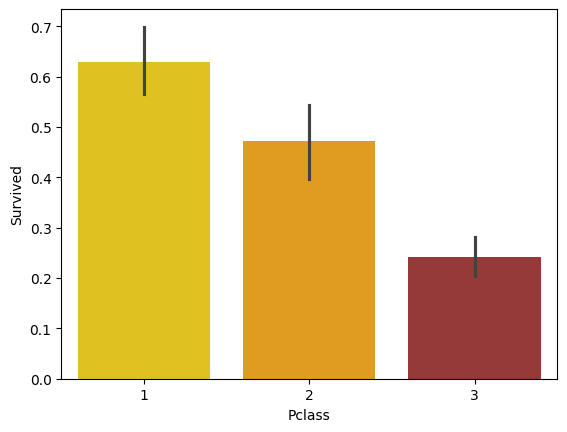

In [31]:
sns.barplot(x='Pclass', y='Survived', data=titanic_train_prepared, palette = {'1': 'gold', '2': 'orange', '3': 'brown'})
plt.show()

In [32]:
titanic_train_prepared = pd.concat([titanic_train_prepared, pd.get_dummies(titanic_train_prepared['Pclass'], drop_first=True)],  axis=1)
titanic_train_prepared

Survived  Pclass                                               Name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
..        ...     ...                                                ...   
886         0       2                              Montvila, Rev. Juozas   
887         1       1                       Graham, Miss. Margaret Edith   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"   
889         1       1                              Behr, Mr. Karl Howell   
890         0       3                                Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0      male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1    female  38.0      1      0          PC 17599  71.2833   C85        C   
2    female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
3    female  35.0      1      0            113803  53.1000  C123        S   
4      male  35.0      0      0            373450   8.0500   NaN        S   
..      ...   ...    ...    ...               ...      ...   ...      ...   
886    male  27.0      0      0            211536  13.0000   NaN        S   
887  female  19.0      0      0            112053  30.0000   B42        S   
888  female   NaN      1      2        W./C. 6607  23.4500   NaN        S   
889    male  26.0      0      0            111369  30.0000  C148        C   
890    male  32.0      0      0            370376   7.7500   NaN        Q   

         2      3  
0    False   True  
1    False  False  
2    False   True  
3    False  False  
4    False   True  
..     ...    ...  
886   True  False  
887  False  False  
888  False   True  
889  False  False  
890  False   True  

[891 rows x 13 columns]

In [33]:
titanic_train_prepared['Title'] = titanic_train_prepared['Name'].str.split(', ', expand=True)[1].str.split('.',  expand=True)[0]
titanic_train_prepared.drop(['Name'], axis=1, inplace=True)
titanic_train_prepared

Survived  Pclass     Sex   Age  SibSp  Parch            Ticket     Fare  \
0           0       3    male  22.0      1      0         A/5 21171   7.2500   
1           1       1  female  38.0      1      0          PC 17599  71.2833   
2           1       3  female  26.0      0      0  STON/O2. 3101282   7.9250   
3           1       1  female  35.0      1      0            113803  53.1000   
4           0       3    male  35.0      0      0            373450   8.0500   
..        ...     ...     ...   ...    ...    ...               ...      ...   
886         0       2    male  27.0      0      0            211536  13.0000   
887         1       1  female  19.0      0      0            112053  30.0000   
888         0       3  female   NaN      1      2        W./C. 6607  23.4500   
889         1       1    male  26.0      0      0            111369  30.0000   
890         0       3    male  32.0      0      0            370376   7.7500   

    Cabin Embarked      2      3 Title  
0     NaN        S  False   True    Mr  
1     C85        C  False  False   Mrs  
2     NaN        S  False   True  Miss  
3    C123        S  False  False   Mrs  
4     NaN        S  False   True    Mr  
..    ...      ...    ...    ...   ...  
886   NaN        S   True  False   Rev  
887   B42        S  False  False  Miss  
888   NaN        S  False   True  Miss  
889  C148        C  False  False    Mr  
890   NaN        Q  False   True    Mr  

[891 rows x 13 columns]

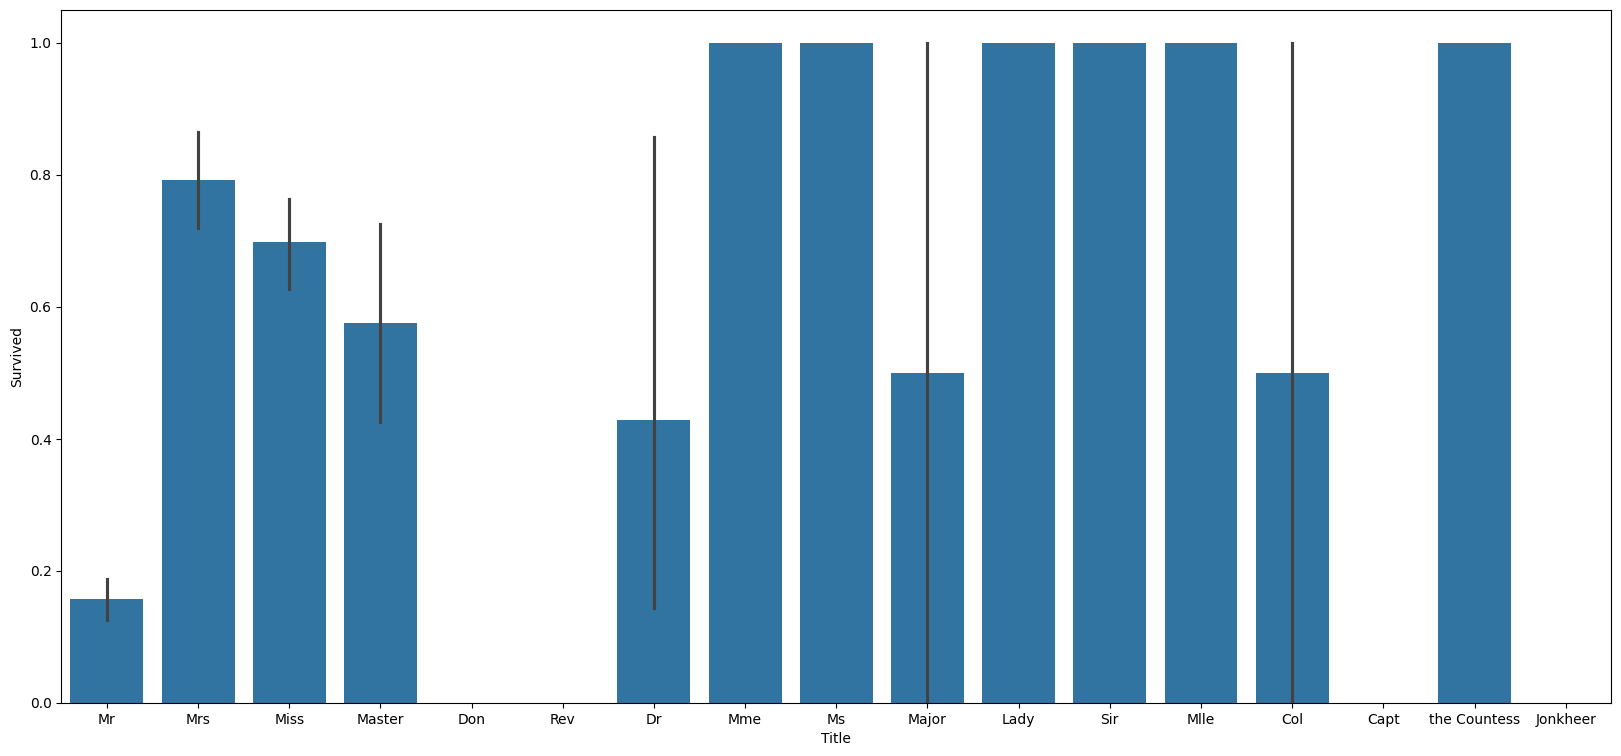

In [34]:
plt.figure(figsize=(20, 9))
sns.barplot(x='Title', y='Survived', data=titanic_train_prepared)
plt.show()

In [35]:
titanic_train_prepared['Title'].value_counts(normalize=True)

Title
Mr              0.580247
Miss            0.204265
Mrs             0.140292
Master          0.044893
Dr              0.007856
Rev             0.006734
Col             0.002245
Mlle            0.002245
Major           0.002245
Ms              0.001122
Mme             0.001122
Don             0.001122
Lady            0.001122
Sir             0.001122
Capt            0.001122
the Countess    0.001122
Jonkheer        0.001122
Name: proportion, dtype: float64

In [36]:
titanic_train_prepared.loc[~titanic_train_prepared['Title'].isin(['Mr', 'Miss', 'Mrs']), 'Title'] = 'Other'
titanic_train_prepared

Survived  Pclass     Sex   Age  SibSp  Parch            Ticket     Fare  \
0           0       3    male  22.0      1      0         A/5 21171   7.2500   
1           1       1  female  38.0      1      0          PC 17599  71.2833   
2           1       3  female  26.0      0      0  STON/O2. 3101282   7.9250   
3           1       1  female  35.0      1      0            113803  53.1000   
4           0       3    male  35.0      0      0            373450   8.0500   
..        ...     ...     ...   ...    ...    ...               ...      ...   
886         0       2    male  27.0      0      0            211536  13.0000   
887         1       1  female  19.0      0      0            112053  30.0000   
888         0       3  female   NaN      1      2        W./C. 6607  23.4500   
889         1       1    male  26.0      0      0            111369  30.0000   
890         0       3    male  32.0      0      0            370376   7.7500   

    Cabin Embarked      2      3  Title  
0     NaN        S  False   True     Mr  
1     C85        C  False  False    Mrs  
2     NaN        S  False   True   Miss  
3    C123        S  False  False    Mrs  
4     NaN        S  False   True     Mr  
..    ...      ...    ...    ...    ...  
886   NaN        S   True  False  Other  
887   B42        S  False  False   Miss  
888   NaN        S  False   True   Miss  
889  C148        C  False  False     Mr  
890   NaN        Q  False   True     Mr  

[891 rows x 13 columns]

In [37]:
titanic_train_prepared = pd.concat([titanic_train_prepared, pd.get_dummies(titanic_train_prepared['Title'], drop_first=True)], axis=1)
titanic_train_prepared.drop(['Title'], axis=1, inplace=True)
titanic_train_prepared

Survived  Pclass     Sex   Age  SibSp  Parch            Ticket     Fare  \
0           0       3    male  22.0      1      0         A/5 21171   7.2500   
1           1       1  female  38.0      1      0          PC 17599  71.2833   
2           1       3  female  26.0      0      0  STON/O2. 3101282   7.9250   
3           1       1  female  35.0      1      0            113803  53.1000   
4           0       3    male  35.0      0      0            373450   8.0500   
..        ...     ...     ...   ...    ...    ...               ...      ...   
886         0       2    male  27.0      0      0            211536  13.0000   
887         1       1  female  19.0      0      0            112053  30.0000   
888         0       3  female   NaN      1      2        W./C. 6607  23.4500   
889         1       1    male  26.0      0      0            111369  30.0000   
890         0       3    male  32.0      0      0            370376   7.7500   

    Cabin Embarked      2      3     Mr    Mrs  Other  
0     NaN        S  False   True   True  False  False  
1     C85        C  False  False  False   True  False  
2     NaN        S  False   True  False  False  False  
3    C123        S  False  False  False   True  False  
4     NaN        S  False   True   True  False  False  
..    ...      ...    ...    ...    ...    ...    ...  
886   NaN        S   True  False  False  False   True  
887   B42        S  False  False  False  False  False  
888   NaN        S  False   True  False  False  False  
889  C148        C  False  False   True  False  False  
890   NaN        Q  False   True   True  False  False  

[891 rows x 15 columns]

In [38]:
titanic_train_prepared = pd.concat([titanic_train_prepared, pd.get_dummies(titanic_train_prepared['Sex'], drop_first=True)], axis=1)
titanic_train_prepared.drop(['Sex'], axis=1, inplace=True)
titanic_train_prepared

Survived  Pclass   Age  SibSp  Parch            Ticket     Fare Cabin  \
0           0       3  22.0      1      0         A/5 21171   7.2500   NaN   
1           1       1  38.0      1      0          PC 17599  71.2833   C85   
2           1       3  26.0      0      0  STON/O2. 3101282   7.9250   NaN   
3           1       1  35.0      1      0            113803  53.1000  C123   
4           0       3  35.0      0      0            373450   8.0500   NaN   
..        ...     ...   ...    ...    ...               ...      ...   ...   
886         0       2  27.0      0      0            211536  13.0000   NaN   
887         1       1  19.0      0      0            112053  30.0000   B42   
888         0       3   NaN      1      2        W./C. 6607  23.4500   NaN   
889         1       1  26.0      0      0            111369  30.0000  C148   
890         0       3  32.0      0      0            370376   7.7500   NaN   

    Embarked      2      3     Mr    Mrs  Other   male  
0          S  False   True   True  False  False   True  
1          C  False  False  False   True  False  False  
2          S  False   True  False  False  False  False  
3          S  False  False  False   True  False  False  
4          S  False   True   True  False  False   True  
..       ...    ...    ...    ...    ...    ...    ...  
886        S   True  False  False  False   True   True  
887        S  False  False  False  False  False  False  
888        S  False   True  False  False  False  False  
889        C  False  False   True  False  False   True  
890        Q  False   True   True  False  False   True  

[891 rows x 15 columns]

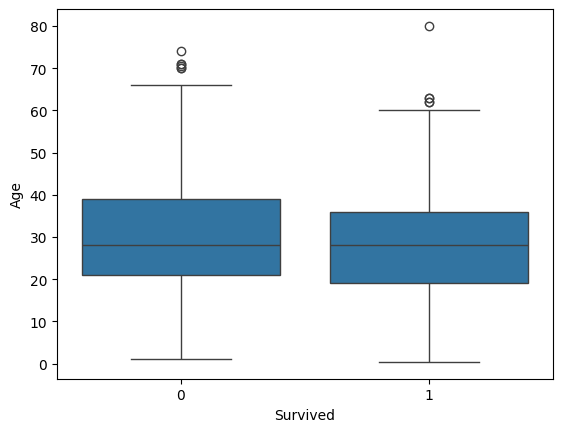

In [39]:
sns.boxplot(y='Age', x='Survived', data=titanic_train_prepared)
plt.show()

<Axes: >

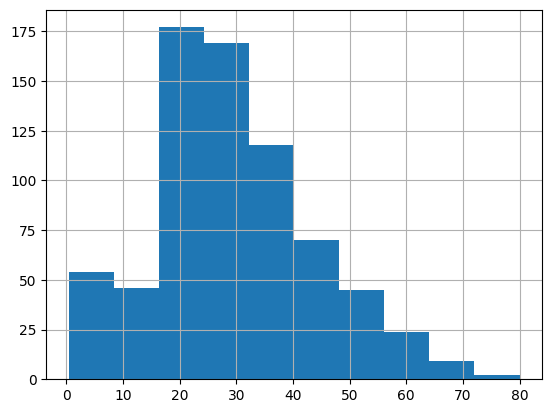

In [40]:
titanic_train_prepared['Age'].hist()

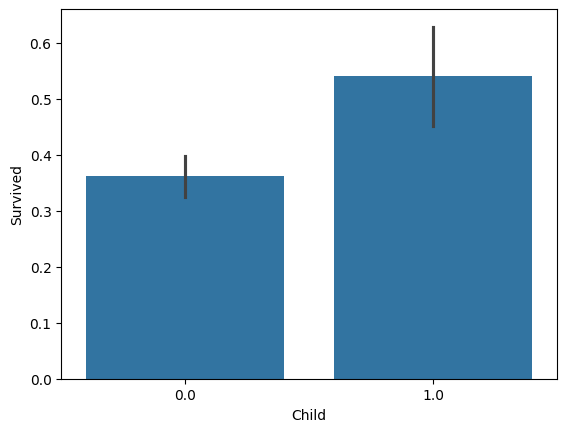

In [41]:
# jeśli wiek niższy niż 18 lat to jest to dziecko
titanic_train_prepared.loc[titanic_train_prepared['Age']<18, 'Child'] = 1

# osoba która nie jest dzieckiem otrzymała wartość 0
titanic_train_prepared.loc[titanic_train_prepared['Child']!=1, 'Child'] = 0
sns.barplot(x='Child', y='Survived', data=titanic_train_prepared)
plt.show()

In [42]:
age_median = titanic_train_prepared['Age'].median()
titanic_train_prepared['Age'] = titanic_train_prepared['Age'].fillna(age_median)
titanic_train_prepared

Survived  Pclass   Age  SibSp  Parch            Ticket     Fare Cabin  \
0           0       3  22.0      1      0         A/5 21171   7.2500   NaN   
1           1       1  38.0      1      0          PC 17599  71.2833   C85   
2           1       3  26.0      0      0  STON/O2. 3101282   7.9250   NaN   
3           1       1  35.0      1      0            113803  53.1000  C123   
4           0       3  35.0      0      0            373450   8.0500   NaN   
..        ...     ...   ...    ...    ...               ...      ...   ...   
886         0       2  27.0      0      0            211536  13.0000   NaN   
887         1       1  19.0      0      0            112053  30.0000   B42   
888         0       3  28.0      1      2        W./C. 6607  23.4500   NaN   
889         1       1  26.0      0      0            111369  30.0000  C148   
890         0       3  32.0      0      0            370376   7.7500   NaN   

    Embarked      2      3     Mr    Mrs  Other   male  Child  
0          S  False   True   True  False  False   True    0.0  
1          C  False  False  False   True  False  False    0.0  
2          S  False   True  False  False  False  False    0.0  
3          S  False  False  False   True  False  False    0.0  
4          S  False   True   True  False  False   True    0.0  
..       ...    ...    ...    ...    ...    ...    ...    ...  
886        S   True  False  False  False   True   True    0.0  
887        S  False  False  False  False  False  False    0.0  
888        S  False   True  False  False  False  False    0.0  
889        C  False  False   True  False  False   True    0.0  
890        Q  False   True   True  False  False   True    0.0  

[891 rows x 16 columns]